# Exploratory Data Analysis on UNHCR Refugees Data From 2012- 2022.

In this article we are going to perform exploratory data analysis(EDA) on UNHCR refugees data for **Canada** from 2012 -2022.

Original data was downloaded from the [unhcr.org](https://www.unhcr.org/refugee-statistics/download/?url=8tIY7I) 

The following **questions** will be answered by this EDA

1. From which countries has **Canada** admitted highest number of refugees?
2. What are the total number of resettled refugees in Canada per year?
3. What are the countries of origin for majority of asylum seekers made in Canada?
4. What are the total number of asylum seekers claims made in Canada every year?
5. What are the general trends in refugees and asylum seekers statistics from 2012 - 2022?

In [1]:
# Import necessary libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("can-stats-2012-22.csv")
df.head()

,Year,Country-of-origin,UNHCR-refugees,Asylum-seekers,total-count
0,2012,Afghanistan,2609,411,3020
1,2012,Albania,1764,579,2343
2,2012,Algeria,513,284,797
3,2012,Angola,753,21,774
4,2012,Antigua and Barbuda,40,30,70


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1870 entries, 0 to 1869
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Year               1870 non-null   int64 
 1   Country-of-origin  1870 non-null   object
 2   UNHCR-refugees     1870 non-null   int64 
 3   Asylum-seekers     1870 non-null   int64 
 4   total-count        1870 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 73.2+ KB


In [23]:
# checking missing values
pd.DataFrame(df.isnull().sum(), columns = ['Missing Values'])

,Missing Values
Year,0
Country-of-origin,0
UNHCR-refugees,0
Asylum-seekers,0
total-count,0


In [3]:
#1.From which countries has Canada admitted highest number of refugees?
df.groupby('Country-of-origin')['UNHCR-refugees'].sum().sort_values(ascending = False).head(10)

Country-of-origin
Colombia                  108416
China                      98586
Ukraine                    88376
Pakistan                   74737
Haiti                      70956
Sri Lanka                  66343
Nigeria                    60554
Mexico                     51072
Türkiye                    42533
Iran (Islamic Rep. of)     40881
Name: UNHCR-refugees, dtype: int64

In [4]:
# Let save our data to visualize
top10refugees = df.groupby('Country-of-origin')['UNHCR-refugees'].sum().sort_values(ascending = False).head(10).reset_index(name = 'Number of Refugees')
top10refugees.head()

,Country-of-origin,Number of Refugees
0,Colombia,108416
1,China,98586
2,Ukraine,88376
3,Pakistan,74737
4,Haiti,70956


Text(0.5, 1.0, ' Top countries of origin refugees that Canada admitt between 2012 -2022')

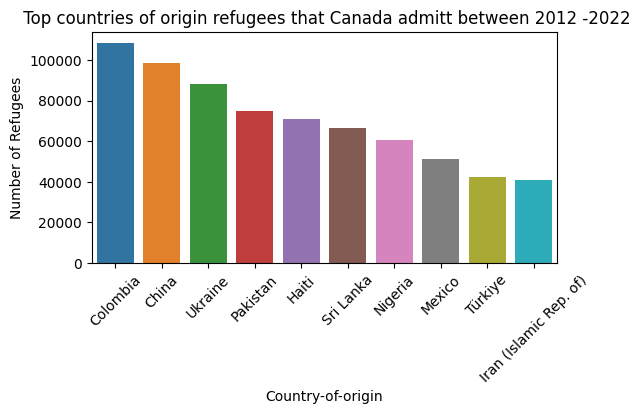

In [9]:
plt.figure(figsize = (6,3))
plt.xticks(rotation = 45)
sns.barplot(top10refugees, x = 'Country-of-origin', y = 'Number of Refugees')
plt.title(' Top countries of origin refugees that Canada admitt between 2012 -2022')

In [10]:
# 2. What are the total number of resettled refugees in Canada per year?
Total_refugees_yrl = df.groupby('Year')['UNHCR-refugees'].sum().reset_index(name = 'Number of Refugees').sort_values(by = 'Year')
Total_refugees_yrl

,Year,Number of Refugees
0,2012,163751
1,2013,160347
2,2014,149164
3,2015,135890
4,2016,97322
5,2017,104768
6,2018,114101
7,2019,101757
8,2020,109214
9,2021,130125


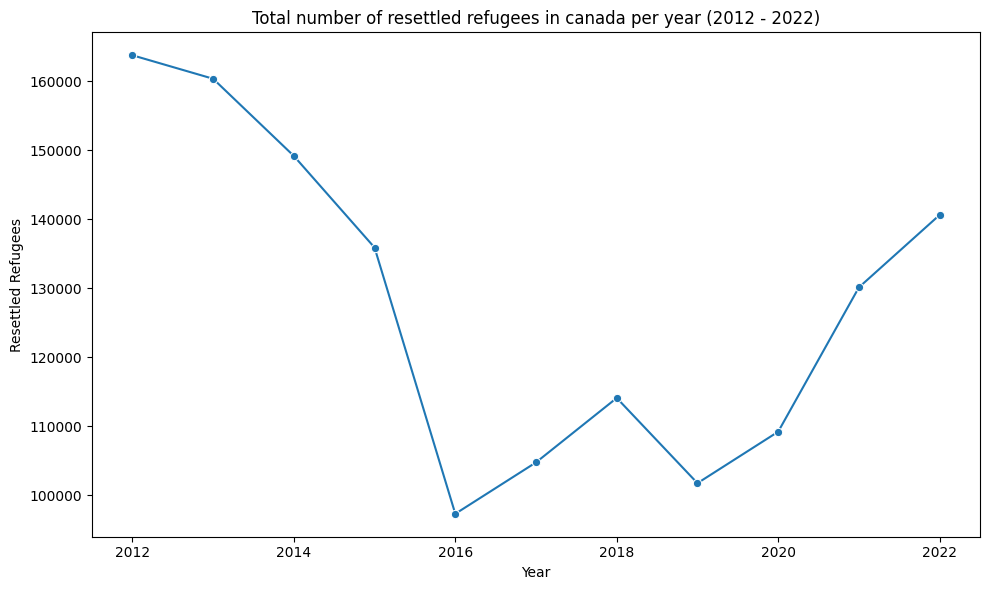

In [11]:
# let visualize using line graph
plt.figure(figsize = (10,6))
sns.lineplot(data = Total_refugees_yrl, x = 'Year', y = 'Number of Refugees', marker = 'o')
plt.xlabel('Year')
plt.ylabel('Resettled Refugees')
plt.title('Total number of resettled refugees in canada per year (2012 - 2022)')
plt.tight_layout()
plt.show()

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1870 entries, 0 to 1869
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Year               1870 non-null   int64 
 1   Country-of-origin  1870 non-null   object
 2   UNHCR-refugees     1870 non-null   int64 
 3   Asylum-seekers     1870 non-null   int64 
 4   total-count        1870 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 73.2+ KB


In [13]:
# What are the countries of origin for majority of asylum seekers made in Canada?
Top_asylum_seekrs = df.groupby('Country-of-origin')['Asylum-seekers'].sum().reset_index(name = 'Number of asylum seekers').sort_values(by = 'Number of asylum seekers', ascending =False).head(10)
Top_asylum_seekrs

,Country-of-origin,Number of asylum seekers
175,Unknown,56098
117,Nigeria,51620
76,India,48806
106,Mexico,47146
72,Haiti,40908
35,Colombia,30475
33,China,21526
121,Pakistan,19023
168,Türkiye,18166
78,Iran (Islamic Rep. of),15011


Text(0.5, 1.0, 'Top 10 number of asylum seekers in canada by their country of origin (2012- 2022)')

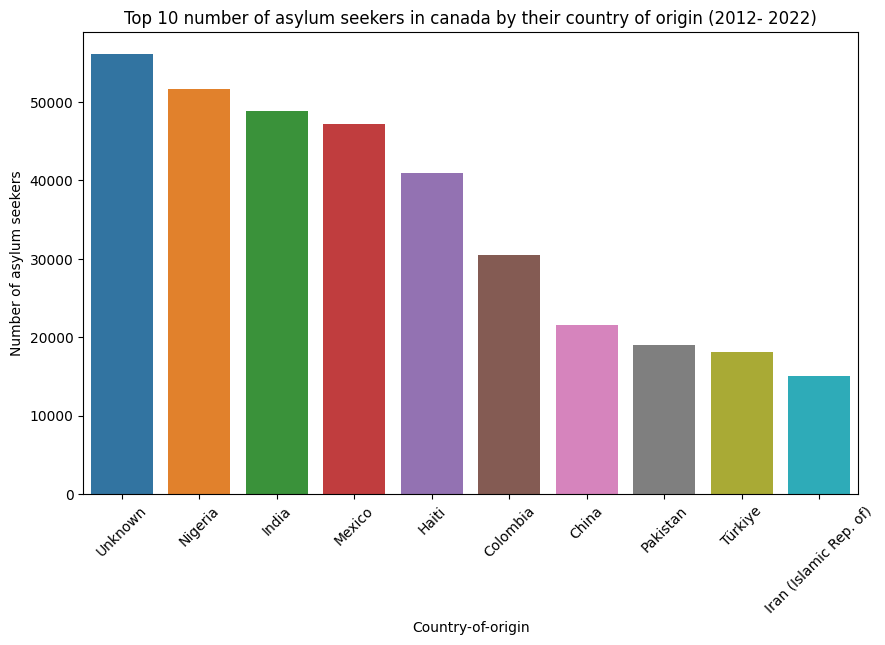

In [14]:
# let visualize by using barplot
plt.figure(figsize = (10,6))
plt.xticks(rotation = 45)
sns.barplot(data = Top_asylum_seekrs, x = 'Country-of-origin', y = 'Number of asylum seekers')
plt.title('Top 10 number of asylum seekers in canada by their country of origin (2012- 2022)')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1870 entries, 0 to 1869
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Year               1870 non-null   int64 
 1   Country-of-origin  1870 non-null   object
 2   UNHCR-refugees     1870 non-null   int64 
 3   Asylum-seekers     1870 non-null   int64 
 4   total-count        1870 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 73.2+ KB


In [16]:
# What are the total number of asylum seekers claims made in Canada every year?
Top_asylum_seekrs_yrl = df.groupby('Year')[['UNHCR-refugees','Asylum-seekers']].sum().reset_index()
Top_asylum_seekrs_yrl

,Year,UNHCR-refugees,Asylum-seekers
0,2012,163751,32647
1,2013,160347,22145
2,2014,149164,16699
3,2015,135890,19631
4,2016,97322,23946
5,2017,104768,51859
6,2018,114101,78766
7,2019,101757,97017
8,2020,109214,85352
9,2021,130125,63143


In [17]:
# let visualize using barplot
final = pd.melt(Top_asylum_seekrs_yrl, id_vars = ['Year'], var_name = ['Category'], value_name = 'Count')
final.tail()

,Year,Category,Count
17,2018,Asylum-seekers,78766
18,2019,Asylum-seekers,97017
19,2020,Asylum-seekers,85352
20,2021,Asylum-seekers,63143
21,2022,Asylum-seekers,113066


Text(0.5, 1.0, 'Top refugees and asylum seekers by year in canada (2012- 2022)')

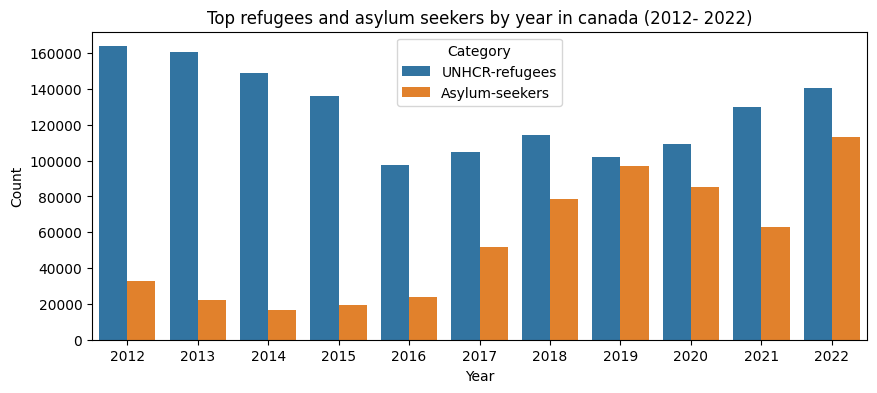

In [20]:
plt.figure(figsize = (10,4))
sns.barplot(data = final, x = 'Year', y ='Count', hue = 'Category')
plt.title('Top refugees and asylum seekers by year in canada (2012- 2022)')

# End